<a href="https://colab.research.google.com/github/profandersonvanin01/machine_learning/blob/main/3_Deteccao_Objetos_YOLO_Vis%C3%A3o_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO - You only look once

Uma das ferramentas de Visão Computacional que tem ganhado muita atenção nos últimos anos é o YOLO: You Only Look Once.

Após o seu lançamento em 2015, o YOLO foi logo reconhecido como uma técnica inovadora pois através de uma abordagem totalmente nova foi capaz de obter uma precisão igual ou superior ao dos outros métodos de detecção de objetos da época, porém com uma velocidade de detecção muito superior.

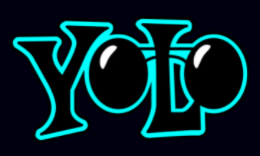

Outro motivo do sucesso do YOLO é o fato de ser totalmente código aberto e livre de licenças de uso. Ou seja, desde o código fonte, até a arquitetura da rede neural e os pesos pré-treinados, tudo isso pode ser usado por qualquer um e de qualquer forma.

## Classificação de Imagens e Detecção de Objetos

Antes de compreender a importância do YOLO, vamos apenas revisar rapidamente o que é a detecção de objetos.

Diferente da classificação, que busca apenas prever a classe presente na imagem, a detecção de objetos além de prever qual é a classe precisa identificar também a localização do objeto nessa imagem. 

Por exemplo, quando construímos um classificador de cachorro e gatos, o nosso classificador vai retornar como resultado da predição a classe (cachorro ou gato) e a confiança (grau de certeza sobre aquela predição).

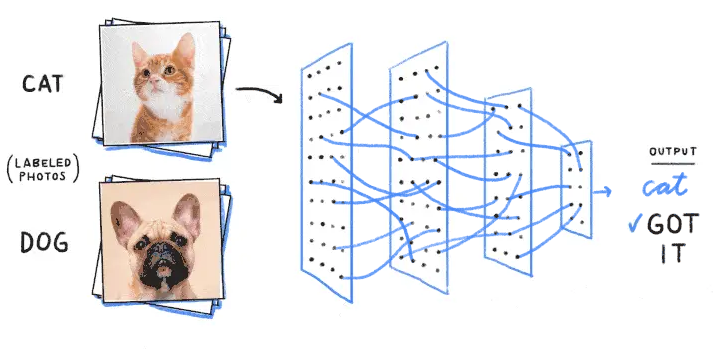

Créditos da imagem: [becominghuman.ai](https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8?gi=2e5e74cf95e9)

Mas e se a imagem tiver tanto o gato quanto o cachorro? Poderíamos talvez treinar classificadores multi-classe que vão ser capazes de identificar as duas classes (tanto cachorro como gato). 

No entanto, nós ainda não temos como saber a localização do cachorro ou gato na imagem. Esse problema de identificar a localização de um objeto (dada a classe) em uma imagem é chamado de localization (localização).

Ser capaz de predizer a localização do objeto na imagem junto com a classe do objeto (para múltiplas classes) é o que chamamos de Detecção de Objetos.



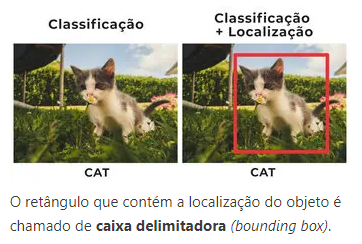

## Darknet

Para o seu funcionamento o YOLO utiliza uma rede neural profunda, cuja arquitetura é chamada de Darknet, que é o mesmo nome do framework utilizado para implementar o detector.

Esse framework foi desenvolvido pelo próprio criador do YOLO, Joseph Redmon.

Ele é open source e escrito na linguagem C, também possui suporte para GPU.

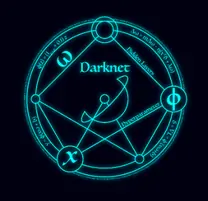

Material baseado em: https://iaexpert.academy/2020/10/13/deteccao-de-objetos-com-yolo-uma-abordagem-moderna/

# PARTE PRÁTICA

Em vários exemplos utilizaremos um ambiente baseado em GPU (utilizando uma placa especial aceleradora de vídeo) para que os processamentos baseados em imagens, sejam executados de forma mais rápida.

1 - Clique no menu **AMBIENTE DE EXECUÇÃO** e escolha **ALTERAR TIPO DE AMBIENTE DE EXECUÇÃO**

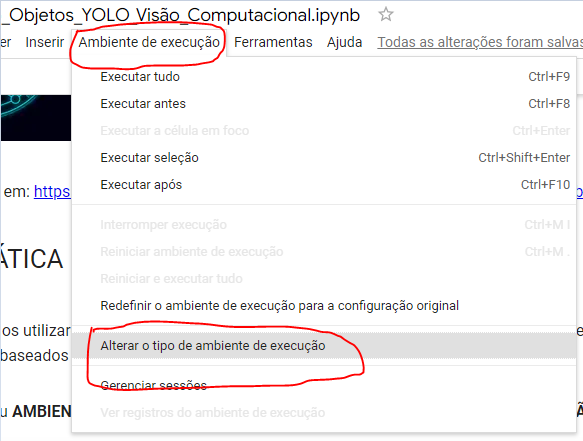

Escolha **GPU**

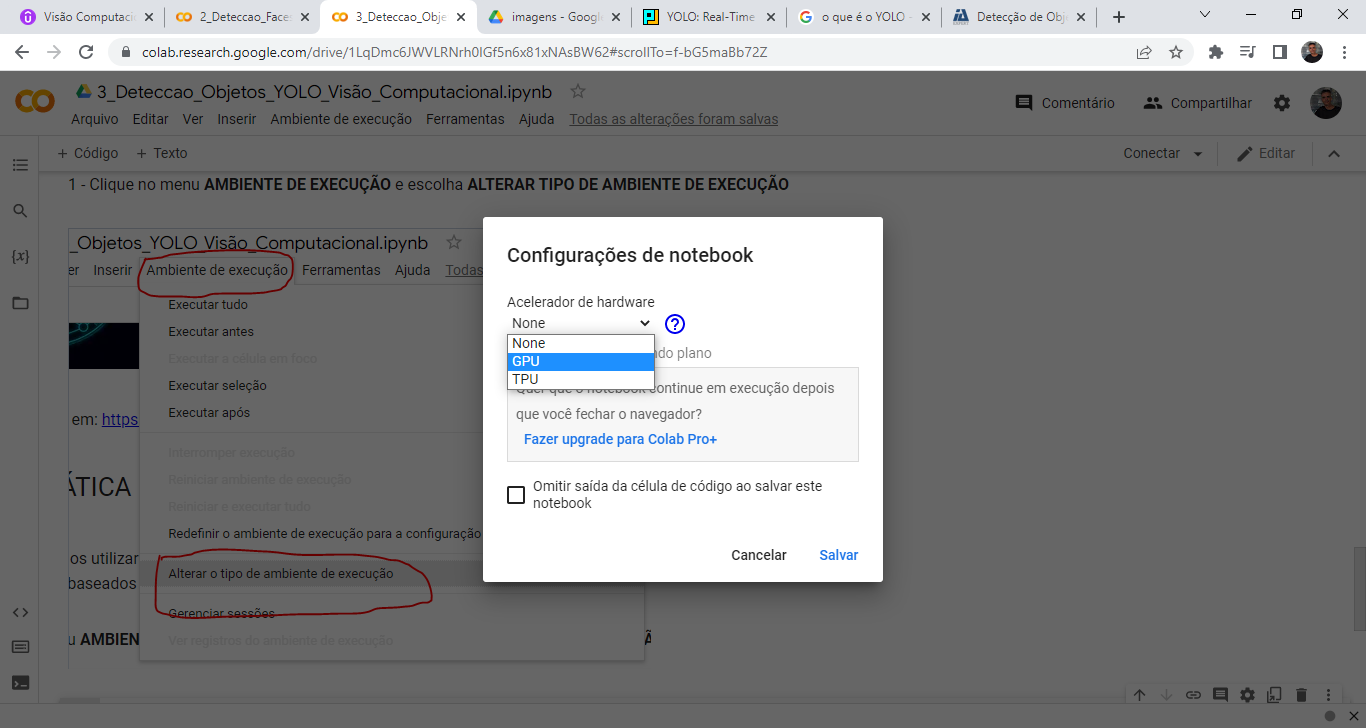

## DOWNLOAD DO DARKNET - Framework de trabalho do YOLO

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

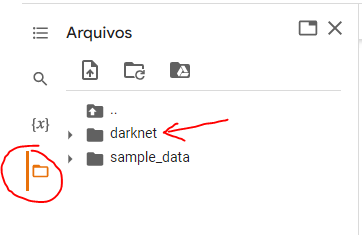

In [ ]:
ls

In [ ]:
cd darknet/

## Compilar a biblioteca

In [ ]:
!make

## Fazer o download dos pesos da Rede Neural Convolucional pré-treinada

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

O arquivo de pesos da Rede Neural será baixado dentro da pasta Darknet

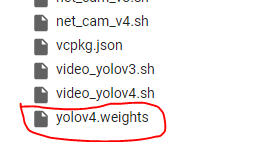

## Realizando Teste com o detector

In [ ]:
ls

Dentro da pasta darknet, temos o arquivo darknet que é o arquivo executável do framework.

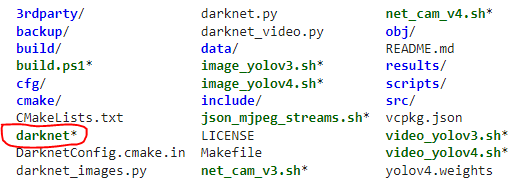

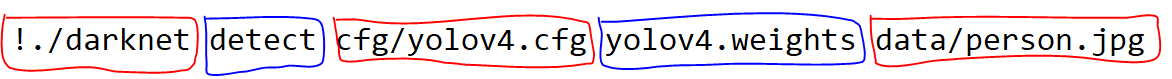

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/person.jpg

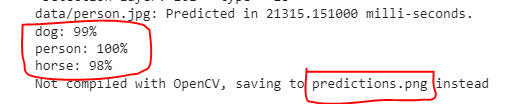

O arquivo predictions.png é salvo na pasta principal (darknet)

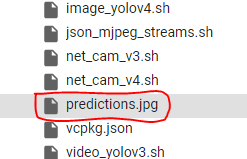

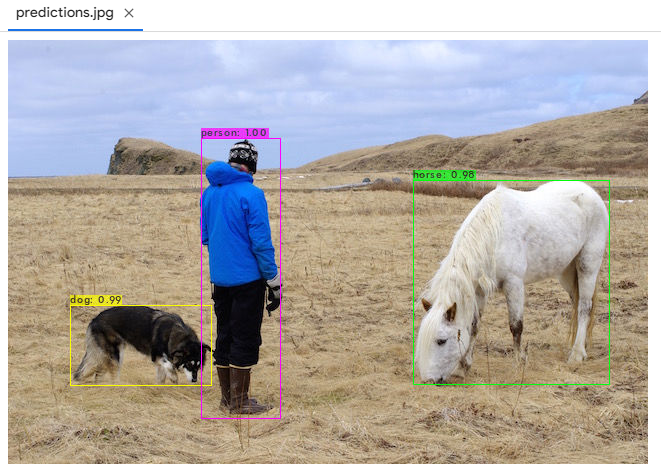

Vamos implementar uma função para melhorar a visualização dos resultados, utilizando a biblioteca Opencv e o matplotlib.

In [ ]:
import cv2
import matplotlib.pyplot as plt
def mostra_deteccao(caminho):
  imagem = cv2.imread(caminho)
  figura = plt.gcf()
  figura.set_size_inches(18,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

In [ ]:
mostra_deteccao('predictions.jpg')

Na etapa em que chamamos o detector do darknet e passamos o arquivo de configuração, os pesos da rede neural e a imagem a ser processada, repare logo no começo do processamento, que nos é informado que a GPU não está sendo utilizada.

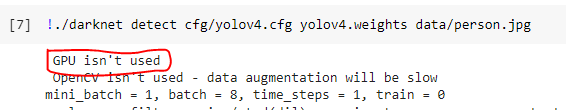

Vamos ativar a GPU dentro do arquivo de configuração do darknet.

O arquivo que detêm estas configurações, é o arquivo **Makefile**.

Vamos editá-lo.

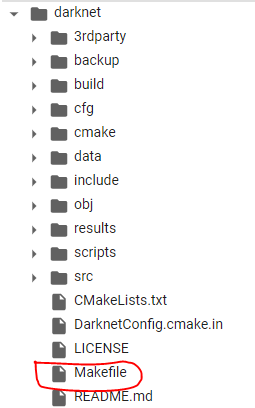

Dê um clique duplo nele para editar.

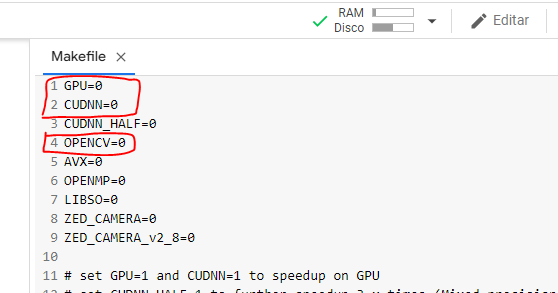

Altere os parâmetros indicados para 1

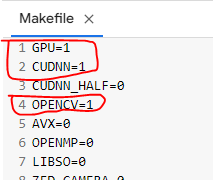

Agora precisamos compilar novamente o Darknet para que as alterações sejam executadas.

In [ ]:
!make

Vamos fazer um novo teste com outra imagem 

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/giraffe.jpg

Podemos verificar que agora o processamento foi muito mais rápido e no inicio do processamento já nos é informado o uso da GPU e possibilidade de utilização do Opencv.

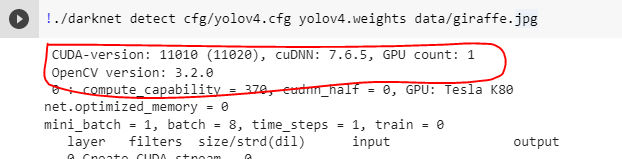

Para visualizar os resultados, basta chamar a função que criamos anteriormente para a exibição dos resultados.

In [ ]:
mostra_deteccao('predictions.jpg')

## Ajustando parâmetros thresold e ext_output

Coco dataset: https://cocodataset.org/#home

Dentro da pasta data, temos um arquivo chamado **coco.names**

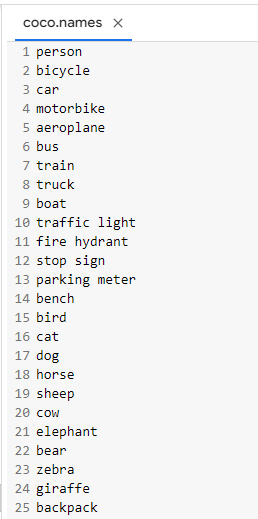

Essa é lista de objetos que podem ser detectados utilizando este dataset. São 80 classes diferentes de objetos.

https://storage.googleapis.com/openimages/web/index.html

!wget https://pjreddie.com/media/files/yolov3-openimages.weights

Vamos fazer um teste inicial sem utilizar nenhum parâmetro adicional

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg

In [ ]:
mostra_deteccao('predictions.jpg')

**1 - Parâmetro Threshould**

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -thresh 0.9

In [ ]:
mostra_deteccao('predictions.jpg')

Perceba que agora só foram detectados 3 cavalos ao invés de 5. Isso se deve ao fato de que aumentamos o nível de confiabilidade da detecção para 0.9.

O nível de confiança é importante de acordo com o problema que você precisa resolver.

**2 - Parâmetro ext_output**

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -ext_output

O parâmetro ext_output trás uma informação muito importante no que diz respeito a detecção de objetos em uma imagem, que é a localização e o tamanho do objeto detectado na imagem.

Isso também é chamado de **Bounding Boxes** (Cada uma das caixas delimitadoras)

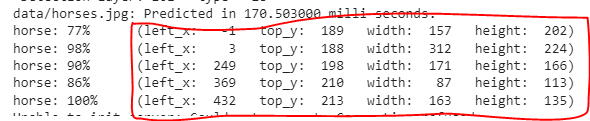

In [ ]:
mostra_deteccao('predictions.jpg')

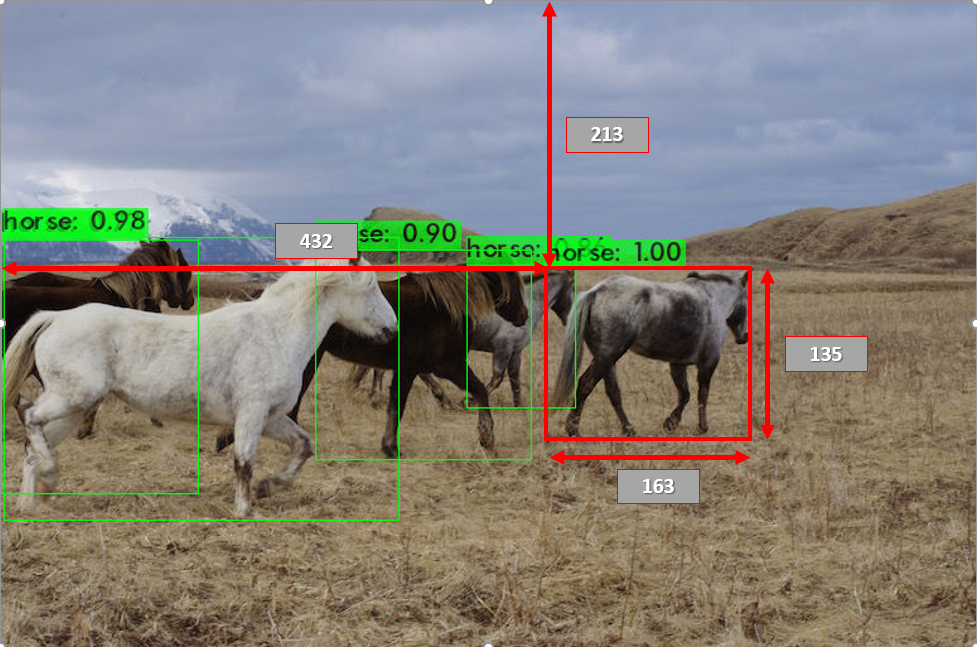

Na próxima aula iremos trabalhar com a detecção de objetos em vídeos. Até mais e muito obrigado.

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/paulista.jpg

In [ ]:
mostra_deteccao('predictions.jpg')

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/bicicleta.jpg

In [ ]:
mostra_deteccao('predictions.jpg')

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/gato-e-cachorro.jpg

In [ ]:
mostra_deteccao('predictions.jpg')

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/gato_mascarado.jpg

In [ ]:
mostra_deteccao('predictions.jpg')